**Kickstarter** is an American public benefit corporation, based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity. The company's stated mission is to "help bring creative projects to life". As of December 2019, Kickstarter has received more than $4.6 billion in pledges from 17.2 million backers to fund 445,000 projects, such as films, music, stage shows, comics, journalism, video games, technology, publishing, and food-related projects.

People who back Kickstarter projects are offered tangible rewards or experiences in exchange for their pledges. This model traces its roots to subscription model of arts patronage, where artists would go directly to their audiences to fund their work

# Data Acquisition

#### There are various formats for a dataset such as .csv, .json, .xlsx etc. The dataset can be stored in different places on your local machine or sometimes online.  In our case, Kickstarter Dataset is an online source and it is in CSV (comma separated value) format.

#### data source: https://www.kaggle.com/kemical/kickstarter-projects
#### data type: csv
#### The Pandas Library is a useful tool that enables us to read various datasets into a data frame; our Jupyter notebook  platforms have a built-in Pandas Library so that all we need to do is import Pandas without installing.
#### Use pandas.read_csv() function to read the csv file. In the bracket, put the file path along so that pandas will read the file into a data frame from that address. The file path can be either an URL or local file address. 

#### Dowload zip file on data source and unpack ks-projects-201801.csv


# Column description
**ID** - internal kickstarter id  <br>
**name**  - name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films. <br>
**category** - category <br>
**main_category** - category of campaign <br>
**currency** - currency used to support <br>
**deadline** - deadline for crowdfunding <br>
**goal** - fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.<br>
**launched** - date launched <br>
**pledged** - amount pledged by "crowd"<br>
**state** - Current condition the project is in<br>
**backers** - number of backers<br>
**country** - country pledged from# usd pledged - amount of money pledged<br>
**usd_goal_real** - amount in USD <br>
**usd_pledged_real** - amount pledged in USD <br>

In [41]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(r"C:\Users\1\Documents\DataScience-Python3\kickstarter-projects\ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [32]:
#Defigning how much we have values and columns
df.shape

(378661, 15)

In [33]:
#Look at our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


**There are 5 columns with datatype - "float64", 2 columns with datatype - "int64", and 8 columns with <br>
datatype - "object"**

In [34]:
#check country column 
df.country.value_counts() 

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

**We see that there is a country, that doesn't exist(N,0"). We can clear it in "data cleaning" stage**

# Null Data

In [35]:
df.isna().sum() 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [37]:
print ('Missing data in each Kickstarter dataframe column:')
for c in df.columns:
    missing_data = len(df) - df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print(c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(df))) * 
        100, 3)), '% of total')

Missing data in each Kickstarter dataframe column:
name : 4 missing values is 0.001 % of total
usd pledged : 3797 missing values is 1.003 % of total


# Duplicates

In [38]:
df[df['ID'].duplicated() == True] #checking for duplicates in the ID column

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


**ID column has no duplicates**

In [39]:
df[df['name'].duplicated() == True] #checking for duplicates in name column

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
6379,1032645935,Cancelled (Canceled),Design,Design,USD,2015-06-05,100000.0,2015-05-06 12:29:08,3105.0,canceled,17,US,3105.0,3105.00,100000.00
7743,1039093987,New EP/Music Development,Music,Music,USD,2016-01-07,3800.0,2015-11-24 15:29:35,257.0,undefined,0,"N,0""",NaN,257.00,3800.00
8356,1042208764,The Basement,Horror,Film & Video,USD,2015-05-07,12000.0,2015-04-07 18:24:19,12311.0,successful,106,US,12311.0,12311.00,12000.00
8448,1042642941,The Gift,Film & Video,Film & Video,USD,2013-05-08,3000.0,2013-04-17 01:55:27,3370.0,successful,37,US,3370.0,3370.00,3000.00
8761,1044230780,Redemption,Narrative Film,Film & Video,USD,2012-08-25,11000.0,2012-06-26 19:13:21,11440.0,successful,67,US,11440.0,11440.00,11000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378140,997542782,Innocent Sin,Indie Rock,Music,USD,2015-01-25,300.0,2014-12-26 18:04:28,600.0,successful,15,US,600.0,600.00,300.00
378224,997919903,Grassroots,Publishing,Publishing,EUR,2017-09-14,10000.0,2017-08-15 18:36:18,21.0,failed,3,IE,0.0,25.12,11963.01
378426,998836498,The InAction,Camera Equipment,Technology,USD,2016-07-29,80000.0,2016-06-28 04:00:08,670.0,canceled,5,US,410.0,670.00,80000.00
378475,999055513,The Last Hurrah,Rock,Music,USD,2012-06-03,5500.0,2012-05-04 15:20:41,7665.0,successful,69,US,7665.0,7665.00,5500.00


**There are 2896 rows with the same name**

# Normalization of Numerical Variables

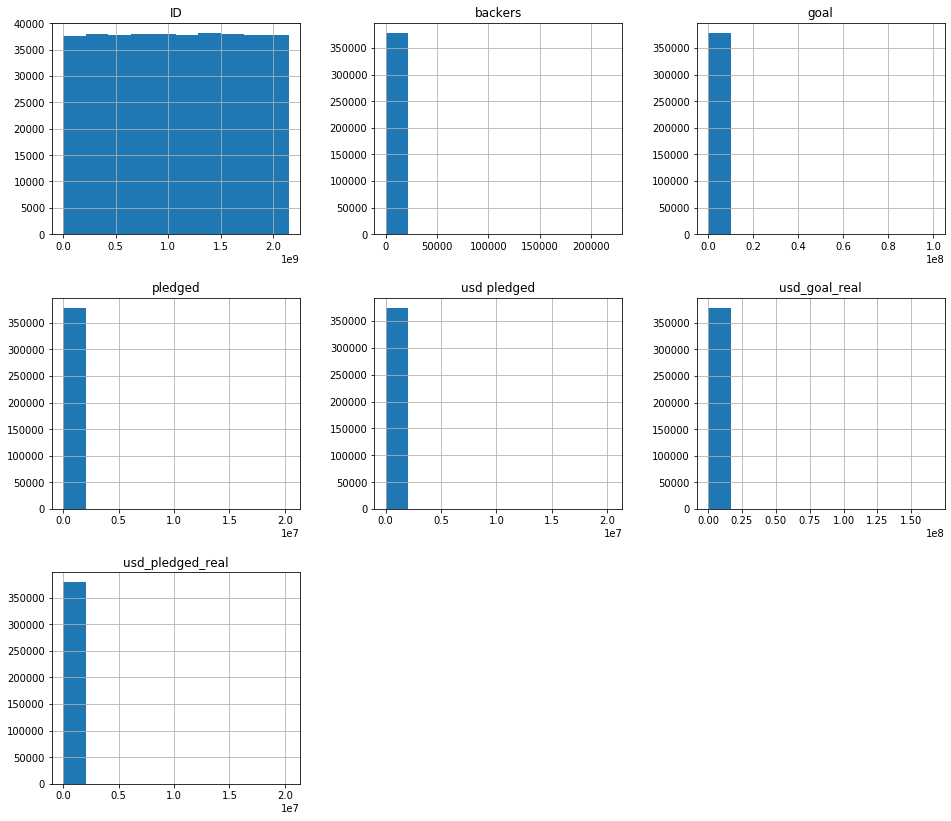

In [42]:
#let's get a better idea of what we're working with here.
df.hist(figsize=(16,14)) 
plt.show()

**There is no normal distribution** <br>
**Last 6- all zero-heavy distributed**

In [21]:
zero=(df.backers == 0).sum() 
total=df['ID'].count()
print (zero,'projects from', total ,'have 0 backers')

51811 projects from 374860 have 0 backers


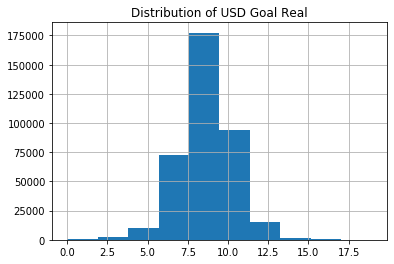

In [22]:
#hist of log transformed usd goal real
np.log(df.usd_goal_real + 1).hist() 
plt.title("Distribution of USD Goal Real")
plt.show()

**The shape of USD goal looks a lot more normal when standardized**

In [12]:
#getting descriptive statistics
df.backers.describe() 

count    378661.000000
mean        105.617476
std         907.185035
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64

In [13]:
# 10 largest values in our backers column
df.backers.nlargest(10)

187652    219382
75900     154926
292244    105857
148585     91585
182657     87142
23404      85581
157270     78471
239175     74405
272924     73986
38291      73206
Name: backers, dtype: int64

**the most 3 successfull projects have more than 100.000 backers**  


In [25]:
#project with highest number of backers
df.loc[187652] 

ID                         1955357092
name                Exploding Kittens
category               Tabletop Games
main_category                   Games
currency                          USD
deadline                   2015-02-20
goal                            10000
launched                   2015-01-20
pledged                   8.78257e+06
state                      successful
backers                        219382
country                            US
usd pledged               8.78257e+06
usd_pledged_real          8.78257e+06
usd_goal_real                   10000
Name: 187652, dtype: object

**This project has a great success because the viral effect**